# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# Import required all packages

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

from sklearn import linear_model
import itertools as it

from copy import deepcopy
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor

import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sns # plotting the data
import matplotlib.pyplot as plt # plotting the data

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Datasets/main/car_data.csv')
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


###The columns are:

Price: suggested retail price of the used 2005 GM car in excellent condition.float

Mileage: number of miles the car has been driven int

Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet object.

Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier object.

Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D object.

Type: body type such as sedan, coupe, etc.object.

Cylinder: number of cylinders in the engineint

Liter: a more specific measure of engine sizefloat

Doors: number of doorsint

Cruise: indicator variable representing whether the car has cruise control (1 = cruise)int

Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)int

Leather: indicator variable representing whether the car has leather seats (1 = leather)int

In [7]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [8]:
df.shape

(804, 12)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(804, 12)

##**From the shape it's clear that we have no duplicates.**

In [11]:
x = df.describe().T
x

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


**CHECK THE PRESENCE OF OUTLIERS**

In [12]:
def outlierpresence(df):
  for i in df.keys():
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    x = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)] #IT WILL GIVE ALL OUTLIERS IN THE DATAFRAME WITH ALL COLUMNS
    if True in y[i].tolist(): #HERE WE CHECK True is in the list of particular column
      print('Outliers', '\033[1m'+ 'present' +'\033[0m', 'in the data of','\033[1m' + i + '\033[0m')
      print('-------------------------------')
    else:
      print('Outliers', '\033[1m'+ ' not present in the data of' +'\033[0m', 'in','\033[1m' + i + '\033[0m') 
      print('-------------------------------') 
outlierpresence(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


Outliers present in the data of Price
-------------------------------
Outliers present in the data of Mileage
-------------------------------
Outliers  not present in the data of in Make
-------------------------------
Outliers  not present in the data of in Model
-------------------------------
Outliers  not present in the data of in Trim
-------------------------------
Outliers  not present in the data of in Type
-------------------------------
Outliers  not present in the data of in Cylinder
-------------------------------
Outliers  not present in the data of in Liter
-------------------------------
Outliers present in the data of Doors
-------------------------------
Outliers present in the data of Cruise
-------------------------------
Outliers  not present in the data of in Sound
-------------------------------
Outliers  not present in the data of in Leather
-------------------------------


##Outlier value over the dataset.

###**EDA**

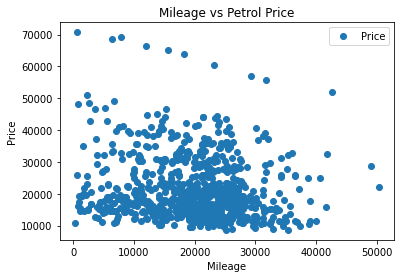

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [14]:
df.plot(x='Mileage',y='Price', style='o')
plt.title('Mileage vs Petrol Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['Mileage', 'Price']].corr()

##Task 1

In [19]:
X = df[['Mileage']].values
y=df['Price'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_trained_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Model Training

In [24]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_trained_scaled, y_train)

LinearRegression()

In [34]:
coeff_df = pd.DataFrame(regressor.coef_,['Price'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Price,-1450.118086


In [35]:
y_pred

array([20612.79639166, 20851.47069916, 21054.27487951, 22370.43262142,
       20828.36205956, 21270.35790501, 19946.09489399, 18845.50281999,
       23650.03042604, 24654.73889097, 20230.81402815, 20935.1101783 ,
       20726.95996938, 23388.76483655, 21749.25859281, 20618.31487276,
       20820.94660058, 22079.50519602, 21647.51159756, 21015.12815422,
       22251.09546767, 20976.8436916 , 20189.25296738, 20656.59933538,
       20858.54125306, 19860.2135319 , 20779.38553981, 20283.41205112,
       22762.76213699, 21358.13624498, 20432.75594584, 21476.26623098,
       20724.89053897, 22153.48733325, 20835.605066  , 21740.80841863,
       23731.60047478, 23137.67394659, 22690.15962004, 21955.51182385,
       22831.39824564, 24594.5529565 , 21097.90537069, 20323.76594415,
       21385.72865047, 19683.44968423, 24239.3007358 , 20135.62022921,
       20214.94839499, 20471.21286099, 22288.51766762, 21355.37700443,
       22994.53834311, 21606.81279946, 23316.16231961, 23906.46734457,
      

In [36]:
y_test

array([14862.0938696 , 16256.23616761, 15802.65286086, 45061.95193515,
       12425.38917116, 25618.2818848 , 15174.34661257, 26012.37462483,
       33005.77995793, 70755.46671654, 13811.15502229, 20839.14996547,
       19774.24906607, 32746.1313865 , 25959.12203037, 15724.25217039,
       24852.49528068, 22004.93043754, 20676.16551095, 14398.92269258,
       10354.04385207, 13106.90042366, 19204.80934142, 21562.04757786,
       20406.09950289, 17768.05950543, 26698.07815105, 16345.94374691,
       19682.03501065, 11472.02276142, 10770.10655376, 11615.02101757,
       43892.46788041, 31002.73441998, 20017.96843019, 25508.21095611,
       18957.8900429 , 17202.8340553 , 35129.34077102, 23547.23944288,
       11318.00808925, 19446.88294074, 31970.54207548, 16300.46523985,
       19294.78750435, 11464.62885878, 20698.07708317, 14077.96885276,
       16713.98468931,  9482.21940385, 15821.94971816, 12507.48526743,
       13681.69800349, 13998.12927577, 18910.80428599, 14061.12276502,
      

In [37]:
regressor.intercept_

21286.771470559215

In [38]:
df = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df

,Actual,Predict
0,14862.093870,20612.796392
1,16256.236168,20851.470699
2,15802.652861,21054.274880
3,45061.951935,22370.432621
4,12425.389171,20828.362060
...,...,...
156,18548.978593,21156.194327
157,36332.894685,20417.580123
158,21683.031464,20137.172302
159,18040.144006,22746.724051


In [39]:
print("R^2 Score: ", metrics.r2_score(y_test, y_pred))

R^2 Score:  0.01651822401249481


##**The given model was not a good fit.**

#Task 2

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Datasets/main/car_data.csv')
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [41]:
b=[]
for i in df.keys():
  b.append(i)
print(b)

['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


## Use mileage, cylinders, liters, doors, cruise, sound, and leather 

In [42]:
X = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].values
y=df['Price'].values

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Model Training

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
coeff_df = pd.DataFrame(regressor.coef_,[['Mileage','Clinder','Liter','Doors','Cruise','Sound','Leather']], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1453.927316
Clinder,4907.009705
Liter,-205.461480
Doors,-1055.235680
Cruise,2727.068033
Sound,-928.144020
Leather,1712.896143


In [50]:
regressor.coef_

array([-1453.92731555,  4907.0097052 ,  -205.46148036, -1055.23568005,
        2727.06803313,  -928.14401958,  1712.89614288])

In [51]:
regressor.intercept_

21435.909487564448

In [52]:
df = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
df

,Actual,Predict
0,14862.093870,26780.043750
1,16256.236168,23120.936063
2,15802.652861,10410.650341
3,45061.951935,33281.276771
4,12425.389171,14413.303103
...,...,...
237,9665.848860,12552.861939
238,15110.192598,18007.341876
239,12878.046829,21345.242206
240,23785.922526,27059.039267


In [53]:
print('R^2 Score: ', metrics.r2_score(y_test, y_pred))

R^2 Score:  0.36747080861239956


##**The given model was not a good fit.**

##Task 3

In [54]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'], selector.support_))

[('Mileage', False),
 ('Cylinder', True),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', True),
 ('Sound', False),
 ('Leather', True)]

###The best combination of factors to predict price are 'Cylinder', 'Cruise' and 'Leather'

##Fitting by dummy variables

---



---



Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Datasets/main/car_data.csv')
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [68]:
b = []
for i in df.keys():
  b.append(i)
print(b)  

['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


In [69]:
df = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [70]:
b = []
for i in df.keys():
  b.append(i)
print(b)  

['Price', 'Mileage', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO', 'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier', 'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette', 'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am', 'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series', 'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo', 'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire', 'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe', 'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']


###We don't want Price and Trim in the feature set b, we newly defined from the dummies

In [71]:
b.remove('Price')
b.remove('Trim')
print(b)

['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO', 'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier', 'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette', 'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am', 'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series', 'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo', 'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire', 'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe', 'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']


###Now we are taking the feature set as b

In [72]:
df

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
X = df[b].values#array of features
y = df['Price'].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Model Training

In [77]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [78]:
coeff_df = pd.DataFrame(regressor.coef_,[b],columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1.536658e+03
Cylinder,8.337871e+02
Liter,1.214920e+03
Doors,3.387945e+14
Cruise,-5.028339e-01
Sound,8.515677e+01
Leather,1.673923e+02
Make_Buick,1.076390e+15
Make_Cadillac,-3.679294e+14
Make_Chevrolet,-3.762325e+15


In [80]:
regressor.intercept_

21283.110526804758

In [81]:
df = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df

,Actual,Predict
0,14862.093870,15230.610527
1,16256.236168,17518.610527
2,15802.652861,15354.610527
3,45061.951935,43885.110527
4,12425.389171,12579.610527
...,...,...
156,18548.978593,19149.610527
157,36332.894685,35010.110527
158,21683.031464,20105.110527
159,18040.144006,21902.110527


In [82]:
print('R^2 Score: ', metrics.r2_score(y_test, y_pred))

R^2 Score:  0.9796694111527388


##**Here we have 97% accuracy of R-2 score**

In [83]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(b, selector.support_))

[('Mileage', False),
 ('Cylinder', False),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', False),
 ('Sound', False),
 ('Leather', False),
 ('Make_Buick', False),
 ('Make_Cadillac', False),
 ('Make_Chevrolet', False),
 ('Make_Pontiac', True),
 ('Make_SAAB', False),
 ('Make_Saturn', False),
 ('Model_9-2X AWD', False),
 ('Model_9_3', False),
 ('Model_9_3 HO', False),
 ('Model_9_5', False),
 ('Model_9_5 HO', False),
 ('Model_AVEO', False),
 ('Model_Bonneville', False),
 ('Model_CST-V', False),
 ('Model_CTS', False),
 ('Model_Cavalier', False),
 ('Model_Century', False),
 ('Model_Classic', False),
 ('Model_Cobalt', False),
 ('Model_Corvette', False),
 ('Model_Deville', False),
 ('Model_G6', False),
 ('Model_GTO', True),
 ('Model_Grand Am', False),
 ('Model_Grand Prix', False),
 ('Model_Impala', False),
 ('Model_Ion', False),
 ('Model_L Series', False),
 ('Model_Lacrosse', False),
 ('Model_Lesabre', False),
 ('Model_Malibu', False),
 ('Model_Monte Carlo', False),
 ('Model_Park Avenue', Fa

In [85]:
sorted(list(zip(selector.ranking_,b)))

[(1, 'Make_Pontiac'),
 (1, 'Model_GTO'),
 (1, 'Model_Sunfire'),
 (2, 'Model_Vibe'),
 (3, 'Model_Grand Am'),
 (4, 'Model_Grand Prix'),
 (5, 'Model_Bonneville'),
 (6, 'Model_G6'),
 (7, 'Type_Coupe'),
 (8, 'Type_Sedan'),
 (9, 'Type_Hatchback'),
 (10, 'Type_Wagon'),
 (11, 'Type_Convertible'),
 (12, 'Make_Cadillac'),
 (13, 'Model_CTS'),
 (14, 'Model_Deville'),
 (15, 'Model_STS-V6'),
 (16, 'Model_STS-V8'),
 (17, 'Model_CST-V'),
 (18, 'Model_XLR-V8'),
 (19, 'Make_SAAB'),
 (20, 'Model_9_5'),
 (21, 'Model_9_5 HO'),
 (22, 'Model_9_3'),
 (23, 'Model_9_3 HO'),
 (24, 'Model_9-2X AWD'),
 (25, 'Make_Buick'),
 (26, 'Make_Chevrolet'),
 (27, 'Make_Saturn'),
 (28, 'Model_Park Avenue'),
 (29, 'Model_Lacrosse'),
 (30, 'Model_Lesabre'),
 (31, 'Model_Century'),
 (32, 'Doors'),
 (33, 'Model_Ion'),
 (34, 'Model_L Series'),
 (35, 'Model_Corvette'),
 (36, 'Model_Impala'),
 (37, 'Model_Malibu'),
 (38, 'Model_Monte Carlo'),
 (39, 'Model_AVEO'),
 (40, 'Model_Cavalier'),
 (41, 'Model_Cobalt'),
 (42, 'Model_Classic')